# 基于单个神经元的手写数字识别

吴明晖

浙江大学城市学院

2020.02

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#本章内容介绍" data-toc-modified-id="本章内容介绍-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>本章内容介绍</a></span></li><li><span><a href="#Tensorflow实现基于单个神经元的手写数字识别" data-toc-modified-id="Tensorflow实现基于单个神经元的手写数字识别-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow实现基于单个神经元的手写数字识别</a></span><ul class="toc-item"><li><span><a href="#神经元函数及优化方法" data-toc-modified-id="神经元函数及优化方法-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>神经元函数及优化方法</a></span><ul class="toc-item"><li><span><a href="#单个神经元的网络模型" data-toc-modified-id="单个神经元的网络模型-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>单个神经元的网络模型</a></span></li><li><span><a href="#激活函数" data-toc-modified-id="激活函数-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>激活函数</a></span></li></ul></li><li><span><a href="#载入数据" data-toc-modified-id="载入数据-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>载入数据</a></span></li><li><span><a href="#构建模型" data-toc-modified-id="构建模型-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>构建模型</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#评估模型" data-toc-modified-id="评估模型-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>评估模型</a></span></li><li><span><a href="#进行预测" data-toc-modified-id="进行预测-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>进行预测</a></span></li></ul></li><li><span><a href="#Tensorflow实现基于单隐层神经网络的手写数字识别" data-toc-modified-id="Tensorflow实现基于单隐层神经网络的手写数字识别-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tensorflow实现基于单隐层神经网络的手写数字识别</a></span></li><li><span><a href="#Tensorflow实现基于多隐层神经网络的手写数字识别" data-toc-modified-id="Tensorflow实现基于多隐层神经网络的手写数字识别-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tensorflow实现基于多隐层神经网络的手写数字识别</a></span></li></ul></div>

# 本章内容介绍

** 本章将介绍如何使用Tensorflow建立神经网络，训练、评估模型并使用训练好的模型识别手写数字MNIST。 ** <br> 
<br>
** 关于MNIST数据集的介绍 **<br>
详见：mnist_introduce.ipynb<br>
<br>
** 由简入繁，首先，构建由单个神经元组成的神经网络，然后尝试将模型加宽和加深，以提高分类准确率。 ** <br> 
** 参考范例程序： ** <br> 
- 单个神经元：mnist_single_neuron.ipynb <br> 
- 单隐层神经网络：mnist_h256.ipynb <br> 
- 多隐层神经网络：mnist_h256_h256.ipynb <br> 


# Tensorflow实现基于单个神经元的手写数字识别

## 神经元函数及优化方法

### 单个神经元的网络模型

** 网络模型 **

<center>
<img src="neuron.jpg" width=500 height=450 />
图1. 单个神经元的网络模型
</center>

计算公式如下：

$${\rm {output}}=f(z)=f(\sum_{i=1}^n w_i \times x_i + b)$$

其中，$z$为输出结果，$x_i$为输入，$w_i$为相应的权重，$b$为偏置，$f$为激活函数。

** 正向传播 **

数据是从输入端流向输出端的，当赋予$w$和$b$合适的值并结合合适的激活函数时，可产生很好的拟合效果。

** 反向传播 **

- 反向传播的意义在于，告诉我们需要将w和b调整到多少。
- 在刚开始没有得到合适的w和b时，正向传播所产生的结果与真实值之间存在误差，反向传播就是利用这个误差信号修正w和b的取值，从而获得一个与真实值更加接近的输出。
- 在实际训练过程中，往往需要多次调整$w$和$b$，直至模型输出值与真实值小于某个阈值。

### 激活函数

运行时激活神经网络中部分神经元，将激活信息向后传入下一层神经网络。<br>
激活函数的主要作用是，加入非线性因素，以解决线性模型表达能力不足的问题。<br>
<br>
** 常用激活函数 **<br>
- （1）** Sigmoid **，在Tensorflow中对应函数为：tf.nn.sigmoid(x, name=None)
- （2）** Tanh **，在Tensorflow中对应函数为：tf.nn.tanh(x, name=None)
- （3）** Relu **，在Tensorflow中对应函数为：tf.nn.relu(x, name=None)


## 载入数据

In [1]:
import tensorflow as tf    # 导入Tensorflow
import numpy as np     # 导入numpy
import matplotlib.pyplot as plt # 导入matplotlib

# 在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会在网页里显示图像
%matplotlib inline

print("Tensorflow版本是：",tf.__version__) #显示当前TensorFlow版本

Tensorflow版本是： 2.0.0


提示
mnist = tf.keras.datasets.mnist 将从网络上自动下载 MNIST 数据集并加载。如果运行时出现网络连接错误，可以从 https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz 或 https://s3.amazonaws.com/img-datasets/mnist.npz 下载 MNIST 数据集 mnist.npz 文件，并放置于用户目录的 .keras/dataset 目录下（Windows 下用户目录为 C:\Users\用户名 ，Linux 下用户目录为 /home/用户名 ）。

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Train image shape:",train_images.shape,"Train label shape:",train_labels.shape)
print("Test image shape:",test_images.shape,"Test label shape:",test_labels.shape)

Train image shape: (60000, 28, 28) Train label shape: (60000,)
Test image shape: (10000, 28, 28) Test label shape: (10000,)


In [ ]:
def get_batch(train_data, train_label, batch_size):
    # 从数据集中随机取出batch_size个元素并返回
    index = np.random.randint(0, np.shape(train_data)[0], batch_size)
    return train_data[index, :], train_label[index]

In [ ]:
# get_batch(train_images, train_labels, 16)

在 TensorFlow 中，图像数据集的一种典型表示是 [图像数目，长，宽，色彩通道数] 的四维张量。在上面的 DataLoader 类中， self.train_data 和 self.test_data 分别载入了 60,000 和 10,000 张大小为 28*28 的手写体数字图片。由于这里读入的是灰度图片，色彩通道数为 1（彩色 RGB 图像色彩通道数为 3），所以我们使用 np.expand_dims() 函数为图像数据手动在最后添加一维通道。

In [ ]:
# train_images = np.expand_dims(train_images.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
# test_images = np.expand_dims(test_images.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]

In [4]:
print("image data:",train_images[1])
print("label data:",train_labels[1])

image data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 25

In [ ]:
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap = 'binary')
    plt.show()

In [ ]:
plot_image(train_images[1])

### 进一步理解reshape()

In [ ]:
import numpy as np
int_array = np.array([i for i in range(64)])
print(int_array)

In [ ]:
int_array.reshape(8,8)

In [ ]:
int_array.reshape(4,16)

In [ ]:
plt.imshow(train_images[1].reshape(14,56), cmap = 'binary')
plt.show()

### 划分验证集

In [5]:
toatal_num = len(train_images)
valid_split = 0.2    # 验证集的比例占20%
train_num = int(toatal_num*(1-valid_split))    #训练集的数目

valid_images = train_images[train_num:]   # 后20%给验证集
valid_labels = train_labels[train_num:]

train_images = train_images[:train_num]    # 前部分给训练集
train_labels = train_labels[:train_num]

In [6]:
valid_images.shape
train_images.shape

(48000, 28, 28)

In [7]:
valid_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
train_images = train_images.reshape(-1,784)
valid_images = valid_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

### 特征数据归一化

In [9]:
train_images = tf.cast(train_images/255.0, tf.float32)
valid_images = tf.cast(valid_images/255.0, tf.float32)
test_images = tf.cast(test_images/255.0, tf.float32)

### 独热编码

In [10]:
x=[3,4]

tf.one_hot(x, depth=10)

<tf.Tensor: id=10, shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [11]:
# 对标签数据进行独热编码
train_labels = tf.one_hot(train_labels, depth=10)
valid_labels = tf.one_hot(valid_labels, depth=10)
test_labels = tf.one_hot(test_labels, depth=10)

## 构建模型

In [12]:
def model(x, w, b):
    pred = tf.matmul(x, w) + b
    return tf.nn.softmax(pred)

### 创建变量

In [13]:
# 定义变量
W = tf.Variable(tf.random.normal([784, 10],mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([10]),dtype = tf.float32) 

### 定义交叉熵损失函数 

In [14]:
# 定义交叉熵损失函数

def loss(x, y, w, b):
    pred = model(x, w, b) #  计算模型预测值和标签值的差异
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y, y_pred=pred)
    return tf.reduce_mean(loss_)  # 求均值，得出均方差.

在本案例中，以正态分布的随机数初始化权重$W$，以常数0初始化偏置$b$

当我们处理多分类任务时，通常需要使用Softmax Regression模型。<br>
Softmax Regression会对每一类别估算出一个概率。<br>
** 工作原理： **将判定为某一类的特征相加，然后将这些特征转化为判定是这一类的概率。<br>

In [15]:
# pred = tf.nn.softmax(forward) # Softmax分类

## 训练模型

### 设置训练参数

In [16]:
training_epochs = 20 # 训练轮数
batch_size = 50  # 单次训练样本数（批次大小）
learning_rate= 0.001  # 学习率

### 定义梯度计算函数

In [17]:
# 计算样本数据[x,y]在参数[w,b]点上的梯度
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])# 返回梯度向量

### 选择优化器

In [18]:
#梯度下降优化器

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

### 定义准确率

In [19]:
def accuracy(x, y, w, b):
    pred = model(x, w, b) #  计算模型预测值和标签值的差异
    # 检查预测类别tf.argmax(pred, 1)与实际类别tf.argmax(y, 1)的匹配情况
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 准确率，将布尔值转化为浮点数，并计算平均值
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

### 模型训练

In [20]:
total_step= int(train_num/batch_size)  # 一轮训练有多少批次
display_step = 1  # 显示粒度

loss_list_train = [] # 用于保存训练集loss值的列表
loss_list_valid = [] # 用于保存验证集loss值的列表
acc_list_train = [] # 用于保存训练集loss值的列表
acc_list_valid = [] # 用于保存验证集loss值的列表

for epoch in range (training_epochs):
    for step in range(total_step):
        xs = train_images[step*batch_size:(step+1)*batch_size]
        ys = train_labels[step*batch_size:(step+1)*batch_size]
        xs = tf.reshape(xs,(-1,784))
        grads = grad(xs, ys, W, B)# 计算梯度
        optimizer.apply_gradients(zip(grads, [W,B])) # 优化器根据梯度自动调整变量w和b
    
    loss_train = loss(train_images, train_labels, W, B).numpy()   # 计算当前轮训练损失
    loss_valid = loss(valid_images, valid_labels, W, B).numpy()   # 计算当前轮验证损失
    acc_train = accuracy(train_images, train_labels, W, B).numpy() 
    acc_valid = accuracy(valid_images, valid_labels, W, B).numpy() 
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print("epoch={:3d} ,train_loss={:.4f},train_acc={:.4f},val_loss={:.4f},val_acc={:.4f}".format(epoch+1, loss_train, acc_train,loss_valid, acc_valid))

epoch=  1 ,train_loss=1.8383,train_acc=0.6705,val_loss=1.7417,val_acc=0.6893
epoch=  2 ,train_loss=1.0722,train_acc=0.7874,val_loss=1.0079,val_acc=0.7998
epoch=  3 ,train_loss=0.8303,train_acc=0.8289,val_loss=0.7869,val_acc=0.8388
epoch=  4 ,train_loss=0.7024,train_acc=0.8515,val_loss=0.6739,val_acc=0.8587
epoch=  5 ,train_loss=0.6219,train_acc=0.8656,val_loss=0.6041,val_acc=0.8702
epoch=  6 ,train_loss=0.5662,train_acc=0.8756,val_loss=0.5564,val_acc=0.8777
epoch=  7 ,train_loss=0.5254,train_acc=0.8826,val_loss=0.5217,val_acc=0.8857
epoch=  8 ,train_loss=0.4934,train_acc=0.8880,val_loss=0.4951,val_acc=0.8894
epoch=  9 ,train_loss=0.4685,train_acc=0.8923,val_loss=0.4747,val_acc=0.8919
epoch= 10 ,train_loss=0.4479,train_acc=0.8958,val_loss=0.4580,val_acc=0.8941
epoch= 11 ,train_loss=0.4305,train_acc=0.8985,val_loss=0.4440,val_acc=0.8967
epoch= 12 ,train_loss=0.4157,train_acc=0.9004,val_loss=0.4321,val_acc=0.8989
epoch= 13 ,train_loss=0.4027,train_acc=0.9026,val_loss=0.4218,val_acc=0.9007

从上述打印结果可以看出损失值** Loss **是趋于更小的，同时，准确率** Accuracy **越来越高。<br>


### 显示训练过程数据

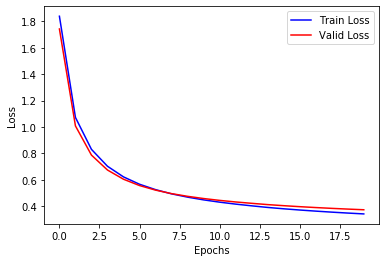

In [21]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")
plt.legend(loc=1)# 通过参数loc指定图例位置

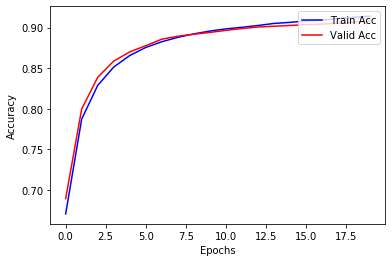

In [22]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train,'blue',label="Train Acc")
plt.plot(acc_list_valid,'red',label="Valid Acc")
plt.legend(loc=1)# 通过参数loc指定图例位置

## 评估模型

#### 完成训练后，在测试集上评估模型的准确率

In [23]:
acc_test = accuracy(test_images, test_labels, W, B).numpy() 
print("Test accuracy:",acc_test)

Test accuracy: 0.9072


## 进行预测

#### 在建立模型并进行训练后，若认为准确率可以接受，则可以使用此模型进行预测

In [27]:
# 定义预测函数
def predit(x, y, w, b):
    pred = model(x, w, b) #  计算模型预测值和标签值的差异
    result = tf.argmax(pred, 1).numpy()
    return result

In [28]:
# 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字

pred_result=predit(test_images, test_labels, W, B)

In [30]:
pred_result[0]

7

#### 查看预测结果

#### 定义可视化函数

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,      # 图像列表
                                  labels,      # 标签列表
                                  prediction,  # 预测值列表
                                  index,       # 从第index个开始显示
                                  num=10 ):    # 缺省一次显示 10 幅
    fig = plt.gcf() # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12)  # 1英寸等于 2.54 cm
    if num > 25: 
        num = 25            # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5,5, i+1) # 获取当前要处理的子图
        
        ax.imshow(np.reshape(images[index],(28, 28)),  # 显示第index个图像
                  cmap='binary')
            
        title = "label=" + str(np.argmax(labels[index]))  # 构建该图上要显示的title信息
        if len(prediction)>0:
            title += ",predict=" + str(prediction[index]) 
            
        ax.set_title(title,fontsize=10)   # 显示图上的title信息
        ax.set_xticks([]);  # 不显示坐标轴
        ax.set_yticks([])        
        index += 1 
    plt.show()

In [ ]:
# plot_images_labels_prediction(mnist.test.images, mnist.test.labels,prediction_result,10,25)

从上面结果可知，通过30次迭代所训练的由** 单个神经元 **构成的神经网络模型，在测试集上能够取得百分之八十以上的准确率。接下来，我们将尝试** 加宽 **和** 加深 **模型，看看能否得到更高的准确率。

# Tensorflow实现基于单隐层神经网络的手写数字识别

详见mnist_h256.ipynb 

# Tensorflow实现基于多隐层神经网络的手写数字识别

详见mnist_h256_h128.ipynb 

In [ ]:
# Tensorflow提供 带softmax的交叉熵函数

loss_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=forward))